# **랜덤 포레스트를 활용한 학생 우울증 예측 모델**
---

# **1. 사용 자료 설명**

### 데이터 개요:
학생들의 다양한 요인(학업, 심리, 생활 습관 등)을 분석하여 **우울증 여부**를 예측하기 위해 설계된 데이터셋.

### **특징(Features)**:
- **Gender**: 학생의 성별 (남/여)
- **Age**: 나이
- **Academic Pressure**: 학업적 압박 수준 (0~10 범위)
- **Study Satisfaction**: 학업 만족도 (0~10 범위)
- **Sleep Duration**: 수면 시간 (충분/부족 등 카테고리형)
- **Dietary Habits**: 식습관 (규칙적/불규칙적 등 카테고리형)
- **Have you ever had suicidal thoughts?**: 자살 생각 경험 여부
- **Study Hours**: 하루 평균 학습 시간
- **Financial Stress**: 재정적 스트레스 수준 (0~10 범위)
- **Family History of Mental Illness**: 정신 질환 가족력 여부

### **타겟(Label)**:
- **Depression**: 학생의 우울증 여부 (Yes: 1, No: 0)

### 데이터 출처 및 링크:
[Depression Student Dataset](https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset)

---

# **2. 사용 알고리즘 설명**

### **랜덤 포레스트(Random Forest)**

#### 알고리즘 개요:
- 랜덤 포레스트는 여러 개의 **결정 트리(Decision Tree)**를 결합한 앙상블(Ensemble) 학습 방법.
- 각 트리는 데이터의 서브샘플을 사용해 독립적으로 학습하고, 결과를 종합하여 최종 예측을 만듦.

#### **랜덤 포레스트 선정 이유**:
1. 데이터셋이 다양한 변수를 포함하고 있으며, 각 변수의 상대적 중요도를 파악할 수 있음.
2. 트리 기반 알고리즘으로 **해석 가능성이 높음**.
3. 과적합을 방지하는 특성이 있어 테스트 데이터에서도 **좋은 성능**을 기대할 수 있음.

---

# **3. 매개변수 선택 근거**

### **튜닝 과정 요약**
- **n_estimators**: 트리 개수 (500)  
  - 다양한 트리 개수에서 테스트 성능을 비교한 결과, 500개일 때 정확도와 학습 시간의 균형이 적절했음.
  
- **max_depth**: 최대 트리 깊이 (8)  
  - 트리 깊이를 제한하여 복잡도를 조절. 깊이를 늘렸을 때 **과적합** 경향이 나타남.
  
- **min_samples_split**: 노드 분할 최소 샘플 수 (10)  
  - 너무 작은 값에서는 트리가 지나치게 복잡해지고, 너무 큰 값에서는 단순화되었음.

### **결과 정확도**
- **훈련 데이터 정확도**: 100%  
- **테스트 데이터 정확도**: 95%  

#### 의미:
- 훈련 데이터에서는 **완벽한 정확도**를 보이며, 테스트 데이터에서도 성능 저하가 크지 않음.  
- 이는 랜덤 포레스트 모델의 **일반화 능력**이 우수함을 나타냄.


## 1. 데이터 불러오기 및 전처리

이 셀에서는 데이터를 불러오고, 범주형 데이터를 수치형으로 변환합니다. `LabelEncoder`를 사용하여 성별, 수면 시간, 식습관, 자살 생각 경험 여부, 가족력 등 범주형 데이터를 0과 1로 변환하여 모델 학습에 적합한 형태로 만듭니다.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# CSV 파일 경로 지정 
file_path = "Depression Student Dataset.csv"

# CSV 파일 읽기
data = pd.read_csv(file_path)

# 범주형 데이터를 수치형으로 변환
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Sleep Duration'] = label_encoder.fit_transform(data['Sleep Duration'])
data['Dietary Habits'] = label_encoder.fit_transform(data['Dietary Habits'])
data['Have you ever had suicidal thoughts ?'] = label_encoder.fit_transform(data['Have you ever had suicidal thoughts ?'])
data['Family History of Mental Illness'] = label_encoder.fit_transform(data['Family History of Mental Illness'])
data['Depression'] = label_encoder.fit_transform(data['Depression'])

# 특성(Features)과 목표 변수(Target) 정의
X = data[['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration', 
          'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Study Hours', 
          'Financial Stress', 'Family History of Mental Illness']]
y = data['Depression']

## 2. 학습 데이터와 테스트 데이터 나누기

데이터를 훈련 데이터와 테스트 데이터로 나누어 모델을 학습하고 평가할 수 있는 구조를 만듭니다. 80%는 훈련 데이터로, 20%는 테스트 데이터로 사용됩니다.


In [ ]:
# 학습 데이터와 테스트 데이터로 나누기 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# 하이퍼파라미터 튜닝을 위한 리스트 정의
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10, 50, 100, 500, 700, 1000]

## 3. 하이퍼파라미터 튜닝 (min_samples_split)

이 셀에서는 `min_samples_split` 값을 조정하여 모델의 성능을 평가합니다. 다양한 값을 시도한 후, 각 값에 대한 훈련 및 테스트 정확도를 그래프로 시각화하여 최적의 하이퍼파라미터를 찾습니다.


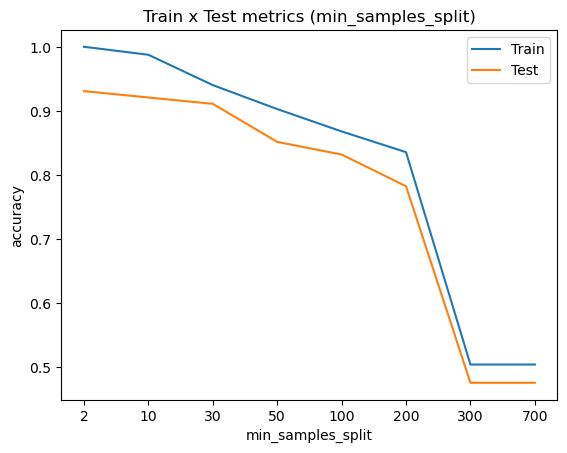

In [42]:
# 정확도를 저장할 리스트
accuracy_list_train = []
accuracy_list_test = []

# min_samples_split 튜닝
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_test = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

# 그래프 그리기 (min_samples_split)
plt.title('Train x Test metrics (min_samples_split)')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train', 'Test'])
plt.show()

## 4. 하이퍼파라미터 튜닝 (max_depth)

이번 셀에서는 `max_depth` 값을 변경하여 트리의 깊이를 조정하고, 그에 따른 모델 성능을 평가합니다. 훈련 및 테스트 정확도를 시각화하여 최적의 트리 깊이를 선택합니다.


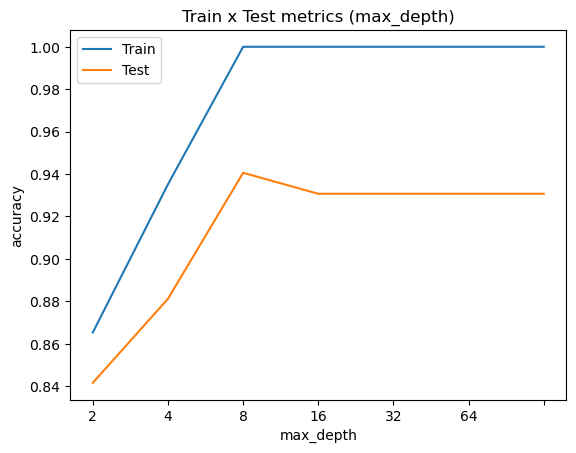

In [43]:
# max_depth 튜닝
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth=max_depth, random_state=42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_test = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

# 그래프 그리기 (max_depth)
plt.title('Train x Test metrics (max_depth)')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train', 'Test'])
plt.show()

## 5. 하이퍼파라미터 튜닝 (n_estimators)

이 셀에서는 `n_estimators`를 조정하여 랜덤 포레스트 모델의 트리 개수를 변경하고, 그에 따른 모델 성능을 평가합니다. 다양한 트리 개수에서의 정확도를 그래프로 시각화하여 최적의 트리 개수를 찾습니다.


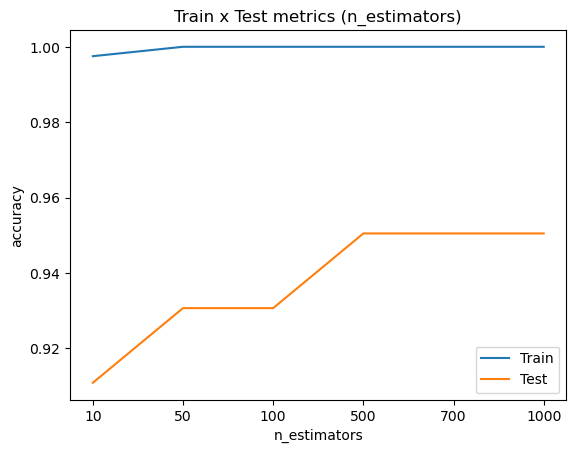

In [44]:
# n_estimators 튜닝
accuracy_list_train = []
accuracy_list_test = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_test = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

# 그래프 그리기 (n_estimators)
plt.title('Train x Test metrics (n_estimators)')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(n_estimators_list)), labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train', 'Test'])
plt.show()

## 6. 최적 하이퍼파라미터로 모델 훈련 및 평가

이 셀에서는 앞에서 찾은 최적의 하이퍼파라미터를 사용하여 랜덤 포레스트 모델을 훈련시키고, 훈련 데이터와 테스트 데이터에서의 정확도를 출력합니다.


In [47]:
# 최종 모델 훈련 (최적 하이퍼파라미터 사용)
random_forest_model = RandomForestClassifier(n_estimators=500, max_depth=8, min_samples_split=2, random_state=42)
random_forest_model.fit(X_train, y_train)

# 훈련 및 테스트 데이터에서의 정확도 출력
print(f"Train Accuracy: {accuracy_score(random_forest_model.predict(X_train), y_train):.4f}")
print(f"Test Accuracy: {accuracy_score(random_forest_model.predict(X_test), y_test):.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.9505


## 7. 특성 중요도 시각화

훈련된 모델을 사용하여 각 특성의 중요도를 추출하고, `seaborn` 라이브러리를 사용하여 중요도를 시각화합니다. 이를 통해 모델이 예측에 가장 영향을 미친 특성을 확인할 수 있습니다.

Feature Importances:
Gender : 0.016
Age : 0.118
Academic Pressure : 0.221
Study Satisfaction : 0.118
Sleep Duration : 0.042
Dietary Habits : 0.051
Have you ever had suicidal thoughts ? : 0.201
Study Hours : 0.109
Financial Stress : 0.104
Family History of Mental Illness : 0.022


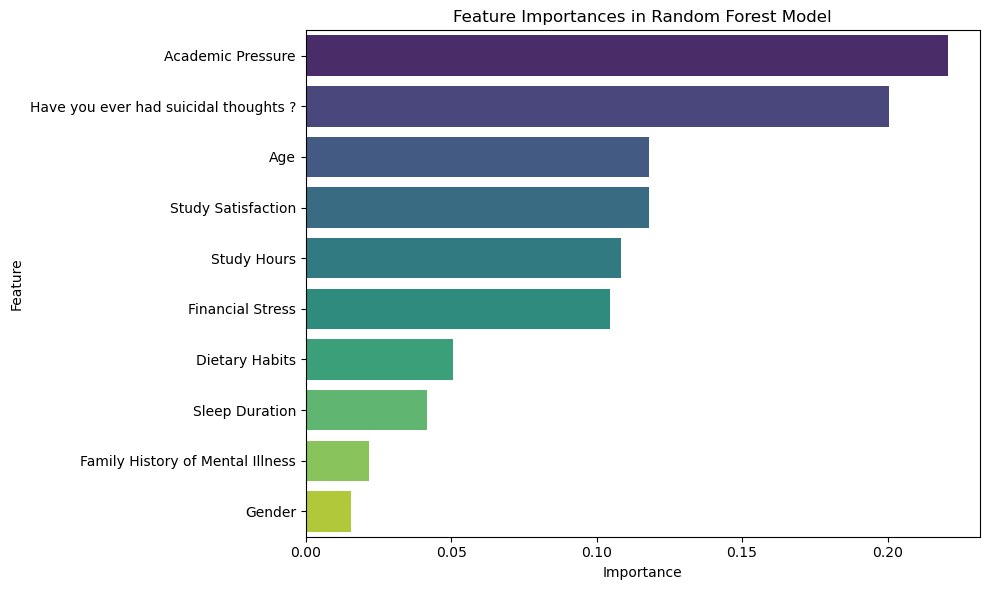

In [46]:
import seaborn as sns
import numpy as np

# 특성 중요도 추출
feature_importances = random_forest_model.feature_importances_
feature_names = X.columns

# 특성 중요도 출력
print("Feature Importances:")
for name, importance in zip(feature_names, feature_importances):
    print(f"{name} : {importance:.3f}")

# 특성 중요도를 데이터프레임으로 정리하고 내림차순 정렬
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title("Feature Importances in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## ChatGPT에게 도움받은 프롬프트

### 1. 프로젝트의 목표 및 코드 구성 방향 설정
#### 도움받은 내용:
*"랜덤 포레스트를 활용한 우울증 예측 모델을 만들고 싶습니다. 어떤 주요 단계로 구성하면 좋을까요?"*  
#### ChatGPT의 답변:
데이터 준비 → 하이퍼파라미터 튜닝 → 모델 훈련 및 평가의 주요 단계를 권장.

---

### 2. 하이퍼파라미터 튜닝 코드 작성
#### 도움받은 내용:
*"랜덤 포레스트의 하이퍼파라미터를 튜닝할 때, 반복문을 활용하여 여러 값을 비교하고 그래프로 시각화하고 싶습니다. 어떻게 작성하면 좋을까요?"*  
#### ChatGPT의 답변:
`for`문을 이용해 `min_samples_split`, `max_depth`, `n_estimators`를 변경하면서 정확도를 저장하고 시각화하는 방법을 제안.

---

### 3. 특성 중요도 시각화
#### 도움받은 내용:
*"랜덤 포레스트로 학습한 뒤, 각 특성의 중요도를 시각화하고 싶습니다. 이를 어떤 방식으로 구현할 수 있을까요?"*  
#### ChatGPT의 답변:
`feature_importances_` 속성을 활용해 중요도를 추출하고, `seaborn`을 이용해 막대그래프를 작성하는 방법을 제안.

